In [19]:
import pickle
import numpy as np
import pandas as pd
import requests
import seaborn as sns 
from bs4 import BeautifulSoup

In [2]:
infile=open('dict_wikiarts.pkl', 'rb')

In [3]:
new_dict=pickle.load(infile)
infile.close()

In [4]:
Paintings = list(map(lambda x : x['Paintings'], new_dict))

In [5]:
type(Paintings)

list

In [6]:
Title=[]
n=0
np=0

In [7]:
for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Title.append(Paintings[i][np]['title'])
        np+=1

In [8]:
len(Title)

10144

In [9]:
Year=[]
Image_URL=[]
Artist_Name=[]

In [10]:
for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Year.append(Paintings[i][np]['year'])
        np+=1
        
for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Image_URL.append(Paintings[i][np]['image'])
        np+=1

for i in range (len(Paintings)):
    np=0
    for e in range (len(Paintings[i])):
        Artist_Name.append(Paintings[i][np]['artistName'])
        np+=1

In [11]:
len(Year)

10144

In [12]:
len(Image_URL)

10144

In [13]:
len(Artist_Name)

10144

In [14]:
Art = pd.DataFrame({'Title':Title, 'Artist Name':Artist_Name, 'Year':Year, 'Image URL':Image_URL})

In [15]:
ArtistName = (Art.groupby('Artist Name').count()).sort_values(by='Title', ascending = False)

In [16]:
ArtistName.head(50)

,Title,Year,Image URL
Artist Name,,,
Byzantine Mosaics,294,294,294
Orthodox Icons,218,218,218
Kazimir Malevich,158,158,158
Ancient Egypt,109,109,109
Alfred Freddy Krupa,103,103,103
Paul Cezanne,94,94,94
Georges Seurat,91,91,91
Giorgio de Chirico,86,86,86
Ancient Greek Painting and Sculpture,71,71,71


In [20]:
url= 'https://www.wikiart.org/en/paintings-by-genre?sortby=1'

In [21]:
page = requests.get(url)

In [22]:
soup = BeautifulSoup(page.content, 'html.parser')

In [23]:
art_type= soup.find_all('li', class_= 'dottedItem')

In [24]:
arts=list()
numbers=[]
n=0

for i in art_type:
    arts.append(i.text)


for i in arts:
    arts[n]=arts[n].strip('\n')
    for e in i.split():
        if e.isdigit():
            numbers.append(int(e))
        else:
            e = e.capitalize()
            arts[n]= e    
    n+=1
    


In [25]:
Type_arts=pd.DataFrame({'Art':arts, 'Number of images':numbers})

In [26]:
a = Type_arts[Type_arts['Number of images']>7000]

<AxesSubplot:xlabel='Number of images', ylabel='Art'>

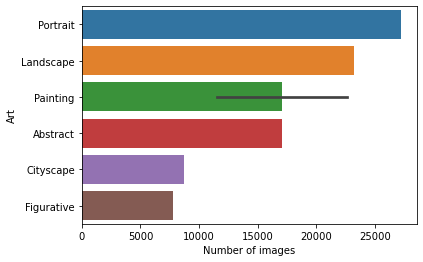

In [27]:
sns.barplot(data=a, y='Art', x='Number of images')

In [28]:
Type_arts.head(20)

,Art,Number of images
0,Portrait,27177
1,Landscape,23193
2,Painting,22637
3,Abstract,17028
4,Painting,11485
5,Cityscape,8668
6,Figurative,7762
7,Study,6972
8,Illustration,6362
9,Life,4610
